<a href="https://colab.research.google.com/github/mootaz11/tunisair_RNN/blob/master/tunisairModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [13]:

df = pd.read_excel("Cours_TAIR_03092020.xlsx")
df = df[["SEANCE","CLOT"]]
df.index=df["SEANCE"]
df=df.drop(columns=["SEANCE"])

In [14]:
df.columns=df.columns.str.lower()


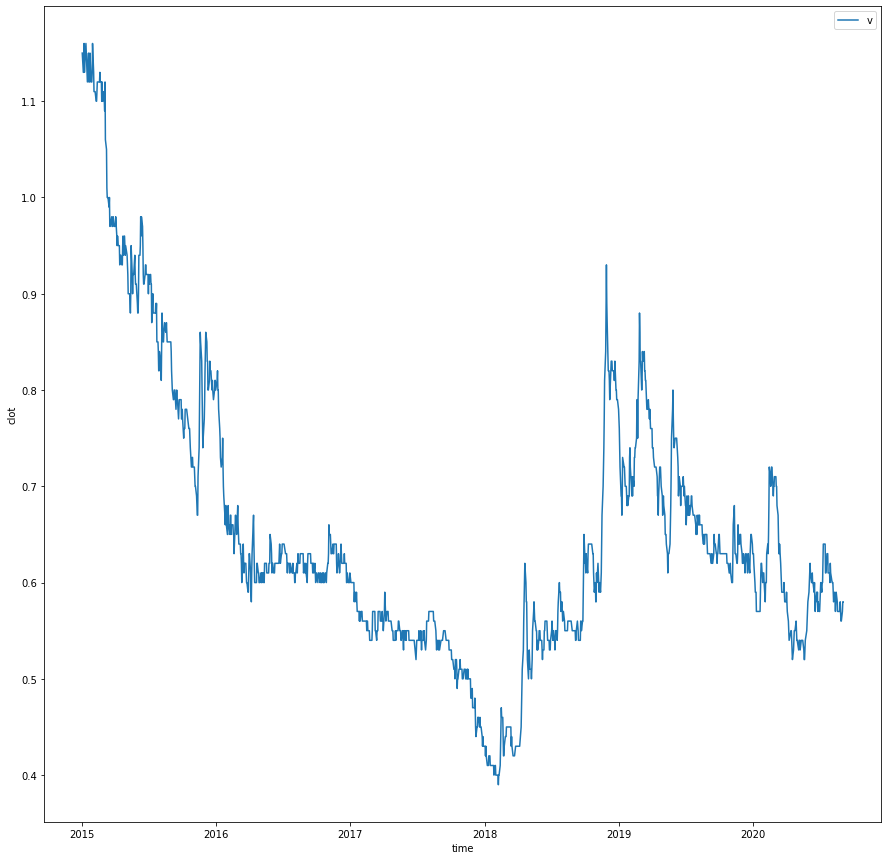

In [15]:
plt.figure(figsize=(15,15))
plt.plot(df["clot"])
plt.xlabel("time")
plt.ylabel("clot")
plt.legend("variation of clot from 2015 to 2020")
plt.show()


In [16]:
test_data=df[df.shape[0]-20:]
train_data=df[:df.shape[0]-20]


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_data)


In [18]:
test_data.to_csv("test_tunisair.csv")
train_data.to_csv("train_tunisair.csv")
train_data = train_data.values
train_data


array([[1.15],
       [1.13],
       [1.13],
       ...,
       [0.62],
       [0.61],
       [0.6 ]])

In [19]:
x_train=[]
y_train=[]

for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])


In [20]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [21]:
from keras.layers import LSTM,Dense,Dropout,Conv1D,Bidirectional
from keras.models import Sequential
model = Sequential()
x_train.shape

(1335, 60, 1)

In [22]:
model.add(Bidirectional(LSTM(70,return_sequences=True,input_shape=(x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(70,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(70,return_sequences=True)))
model.add(Dropout(0.2))


model.add(Bidirectional(LSTM(70,return_sequences=True,)))
model.add(Dropout(0.3))

model.add(LSTM(70))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer="RMSProp",loss="mean_absolute_error")


In [23]:
model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 15s 428ms/step - loss: 0.1254 - val_loss: 0.0996
Epoch 2/100
34/34 [==============================] - 11s 332ms/step - loss: 0.0741 - val_loss: 0.1122
Epoch 3/100
34/34 [==============================] - 12s 340ms/step - loss: 0.0667 - val_loss: 0.0493
Epoch 4/100
34/34 [==============================] - 11s 336ms/step - loss: 0.0579 - val_loss: 0.0348
Epoch 5/100
34/34 [==============================] - 11s 330ms/step - loss: 0.0512 - val_loss: 0.0313
Epoch 6/100
34/34 [==============================] - 11s 330ms/step - loss: 0.0505 - val_loss: 0.0241
Epoch 7/100
34/34 [==============================] - 11s 327ms/step - loss: 0.0492 - val_loss: 0.0209
Epoch 8/100
34/34 [==============================] - 11s 328ms/step - loss: 0.0455 - val_loss: 0.0355
Epoch 9/100
34/34 [==============================] - 11s 326ms/step - loss: 0.0420 - val_loss: 0.0375
Epoch 10/100
34/34 [==============================] - 11s 326ms/step - loss: 0.043

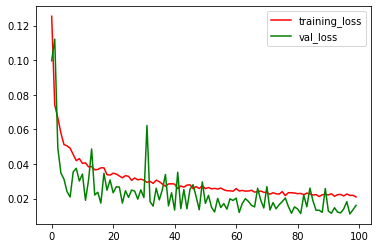

In [24]:
  import matplotlib.pyplot as plt 
plt.plot(range(0,100),model.history.history["loss"],'r',label="training_loss")
plt.plot(range(0,100),model.history.history["val_loss"],'g',label="val_loss")
plt.legend()
plt.show()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 60, 140)           40320     
_________________________________________________________________
dropout (Dropout)            (None, 60, 140)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 140)           118160    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 140)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 140)           118160    
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 140)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60, 140)           1

In [26]:
df_train=pd.read_csv("train_tunisair.csv")
df_test=pd.read_csv("test_tunisair.csv")

df_train.set_index("SEANCE",inplace=True)
df_test.set_index("SEANCE",inplace=True)

full_dataset =pd.concat((df_train["clot"],df_test["clot"]),axis=0)

In [27]:
full_dataset.shape

(1415,)

In [28]:
test=full_dataset[len(full_dataset)-len(df_test)-60:]
test=test.values.reshape(-1,1)
test_scaled=scaler.transform(test)
x_test=[]
for i in range (60,len(test_scaled)):
  x_test.append(test_scaled[i-60:i,0])
x_test = np.array(x_test)  

In [29]:
x_test=np.reshape(x_test,  (x_test.shape[0],x_test.shape[1],1)  )
predictions=scaler.inverse_transform(model.predict(x_test))

In [30]:
predictions

array([[0.60589105],
       [0.60431516],
       [0.60459393],
       [0.5953124 ],
       [0.58450353],
       [0.5917352 ],
       [0.58444196],
       [0.57368284],
       [0.5898222 ],
       [0.5842001 ],
       [0.5732867 ],
       [0.5714611 ],
       [0.5713465 ],
       [0.5711465 ],
       [0.5800774 ],
       [0.5730081 ],
       [0.56253314],
       [0.5605853 ],
       [0.56917125],
       [0.57987607]], dtype=float32)

In [31]:
from keras.metrics import mean_absolute_error

In [32]:
mean_absolute_error(test_data["clot"].values,predictions).numpy()

array([0.02789106, 0.02631517, 0.02659394, 0.01824995, 0.01125177,
       0.01538816, 0.01122099, 0.00963171, 0.01391109, 0.01110005,
       0.00967132, 0.00985389, 0.00986534, 0.00988535, 0.00903871,
       0.00969918, 0.01597348, 0.01753173, 0.01066299, 0.00901239],
      dtype=float32)

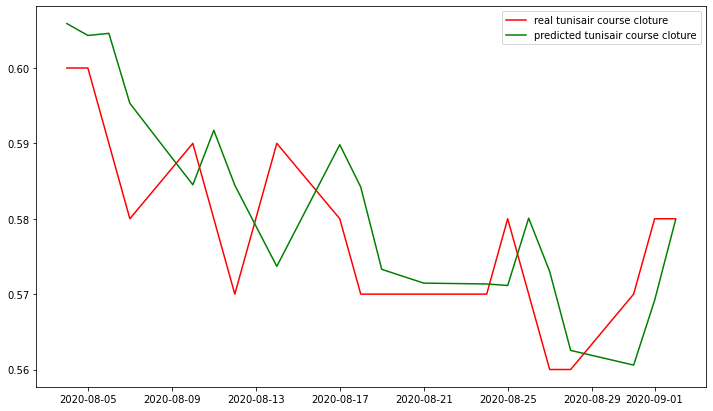

In [65]:

import datetime
date = []
for d in test_data.index.values:
  date.append(str(d).split('T')[0])
dates=[datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in date]
plt.figure(figsize=(12,7))
plt.plot(dates,test_data["clot"].values,color="r",label="real tunisair course cloture")
plt.plot(dates,predictions,color="g",label="predicted tunisair course cloture")
plt.legend()
plt.show()